In [4]:
import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = 'Datasets_B/Train' #All folders will be there according to number of classes.
valid_path = 'Datasets_B/Test' #All folders will be there according to number of classes.

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

#don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
#useful for getting number of classes
folders_Train = glob('Datasets_B/Train/*')
folders_Test = glob('Datasets_B/Test/*')
print("Total number of folder in Test:",len(folders_Train))
print("Total number of folder in Test:",len(folders_Test))

Total number of folder in Test: 2
Total number of folder in Test: 2


In [6]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders_Train), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Datasets_B/Train', target_size = (224, 224), batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Datasets_B/Test', target_size = (224, 224), batch_size = 32,
                                            class_mode = 'categorical')
print(len(training_set))
print(len(test_set))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

/home/amit/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
163/163 [==============================] - 11093s 68s/step - loss: 0.2780 - accuracy: 0.8820 - val_loss: 0.0930 - val_accuracy: 0.9717
Epoch 2/5
163/163 [==============================] - 11388s 70s/step - loss: 0.0661 - accuracy: 0.9775 - val_loss: 0.0973 - val_accuracy: 0.9594
Epoch 3/5
163/163 [==============================] - 11230s 69s/step - loss: 0.0482 - accuracy: 0.9841 - val_loss: 0.1641 - val_accuracy: 0.9575
Epoch 4/5
163/163 [==============================] - 10721s 66s/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0755 - val_accuracy: 0.9679
Epoch 5/5
163/163 [==============================] - 12376s 76s/step - loss: 0.0294 - accuracy: 0.9912 - val_loss: 0.0742 - val_accuracy: 0.9754


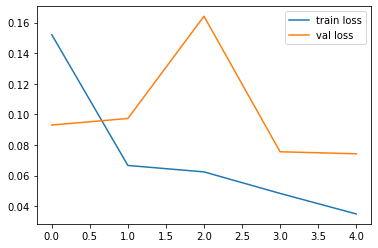

<Figure size 432x288 with 0 Axes>

In [7]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

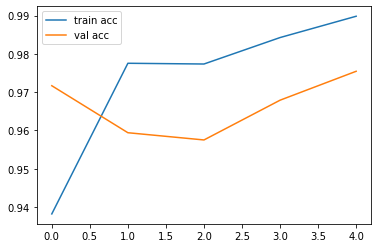

<Figure size 432x288 with 0 Axes>

In [10]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
from keras.models import load_model

model.save('b_model.h5')